In [2]:
import os
import pandas as pd
import pyodbc

import numpy as np 
import matplotlib.pyplot as plt

from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns

Accessing SQL database for the ML model

In [3]:
server = 'gen10-data-fundamentals-22-02-sql-server.database.windows.net'
database = 'guinea-pigs-database'
username = 'gPigs'
password = 'GuineaPigs!'
driver='{SQL Server}'

cnxn = pyodbc.connect('DRIVER='+driver+';SERVER='+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()
cursor.execute("SELECT * FROM NonNormalizedData WHERE [SBA Disaster Number] != '0'")
rows = cursor.fetchall()
c = [column[0] for column in cursor.description]
ma_df = pd.DataFrame([tuple(t) for t in rows], columns = c) 
ma_df

Approved Amount Content Approved Amount EIDL Approved Amount Real Estate  \
0                        0.0                  0.0                         0.0   
1                        0.0                  0.0                         0.0   
2                   162200.0              46900.0                    279800.0   
3                        0.0                  0.0                         0.0   
4                     3700.0               1400.0                     78600.0   
...                      ...                  ...                         ...   
1720                     0.0                  0.0                      8800.0   
1721                     0.0                  0.0                         0.0   
1722                     0.0                  0.0                         0.0   
1723                     0.0                  0.0                         0.0   
1724                     0.0                  0.0                         0.0   

       County Damaged Property Zip Code Fines and Forfeits Interest Revenue  \
0      MARION                   39429.0                  0               18   
1     COAHOMA                   38645.0                  0              459   
2        COOK                   60154.0                137              837   
3        COOK                   60501.0                137              837   
4        COOK                   60501.0                137              837   
...       ...                       ...                ...              ...   
1720    LAMAR                   39455.0                  0               10   
1721  LINCOLN                   39601.0                  0               42   
1722  LINCOLN                   39629.0                  0               42   
1723   MARION                   39643.0                  0               18   
1724   MARION                   39483.0                  0               18   

            Market Value Property Tax SBA Disaster Number  \
0     1382.9099999999999         2505            MS-00059   
1                1277.77         5979            MS-00045   
2                1135.68        11145            IL-00025   
3                1135.68        11145            IL-00025   
4                1135.68        11145            IL-00025   
...                  ...          ...                 ...   
1720  1382.9099999999999         2665            MS-00059   
1721  1382.9099999999999         2970            MS-00059   
1722  1382.9099999999999         2970            MS-00059   
1723  1382.9099999999999         2505            MS-00059   
1724  1382.9099999999999         2505            MS-00059   

     SBA EIDL Declaration Number SBA Physical Declaration Number        State  \
0                        13274.0                           13273  MISSISSIPPI   
1                        12549.0                           12548  MISSISSIPPI   
2                        12291.0                           12290     ILLINOIS   
3                        12291.0                           12290     ILLINOIS   
4                        12291.0                           12290     ILLINOIS   
...                          ...                             ...          ...   
1720                     13274.0                           13273  MISSISSIPPI   
1721                     13274.0                           13273  MISSISSIPPI   
1722                     13274.0                           13273  MISSISSIPPI   
1723                     13274.0                           13273  MISSISSIPPI   
1724                     13274.0                           13273  MISSISSIPPI   

          Timestamp Total Salaries & Wages Unemployement  \
0     1652963921671                   3621          10.3   
1     1652961848596                  39814          13.8   
2     1652963944485                  24662          10.9   
3     1652963946489                  24662          10.9   
4     1652963948533                  24662          10.9   
...             .

In [4]:
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
X = ma_df.drop(['Unemployement', 'County', 'SBA Disaster Number', 'State', 'Timestamp','_c0','SBA EIDL Declaration Number','SBA Physical Declaration Number'], axis=1.)
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(X)
robust_df = pd.DataFrame(robust_df)

Defining 'X' and 'y' variables. We are predicting Unemployment rate, so we are using that column as our 'y' value. Our 'X' value will be only the numerical data without the unemployment rate.


Executing the train test split method to split our dataset to be used for training and then testing the model. 

In [82]:
                                                                                                              

y = ma_df['Unemployement']
#X = ma_df.drop(['Unemployement', 'County', 'SBA Disaster Number', 'State', 'Timestamp','_c0','SBA EIDL Declaration Number','SBA Physical Declaration Number'], axis=1.)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.25, random_state=0)

In [86]:
model = ElasticNet(alpha=1.0, l1_ratio=0.5,max_iter=10000)
ma_enet_model = model.fit(X_train, y_train)

In [69]:
ma_enet_model.coef_ 

array([ 8.83491866e-07, -1.82398998e-06, -1.92533334e-07, -8.40982338e-06,
       -3.98127381e-05, -3.66142187e-05, -3.34810186e-03,  4.95004879e-07,
        2.67284392e-06, -3.32441592e-07,  1.48015011e-07,  1.59074593e-01])

In [70]:
ma_enet_model.intercept_

-306.60623605191427

In [55]:
train_prediction = ma_enet_model.predict(X_train)[:10]

train_prediction


array([7.24150434, 8.85724372, 8.44064355, 8.20667814, 8.4626073 ,
       7.24855341, 8.19315676, 9.31139598, 8.16841175, 9.12301726])

In [56]:
model_prediction = ma_enet_model.predict(X_test)[:10]

model_prediction

array([9.22924982, 8.17911162, 9.32294388, 8.47987663, 8.99168539,
       8.94632666, 8.48856844, 8.97483323, 8.33136208, 8.65058145])

In [9]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [10]:

clf = GridSearchCV(model, {'alpha': [0.5,1,5,10],'l1_ratio': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]},cv=10)
clf.fit(X_train, y_train)
clf.cv_results_



{'mean_fit_time': array([0.00870976, 0.00763164, 0.00782959, 0.00730331, 0.00710301,
        0.00787315, 0.00775969, 0.00751786, 0.00802233, 0.00838935,
        0.00736241, 0.00737772, 0.00721242, 0.0073802 , 0.00920603,
        0.00906773, 0.00872197, 0.00870771, 0.00993657, 0.00940249,
        0.00874102, 0.00844615, 0.00752685, 0.00755587, 0.00707107,
        0.00756216, 0.00737367, 0.00733495, 0.00811522, 0.00780795,
        0.00734076, 0.009303  , 0.00806415, 0.00754037, 0.00728686,
        0.00674965]),
 'std_fit_time': array([0.00173775, 0.00120526, 0.00160554, 0.00141931, 0.00092786,
        0.0016995 , 0.0009367 , 0.00109465, 0.00115968, 0.00122566,
        0.00158653, 0.00112679, 0.00120338, 0.00105109, 0.00140823,
        0.00118625, 0.00119075, 0.00103235, 0.00140895, 0.00156681,
        0.00105268, 0.00162046, 0.00145591, 0.0013729 , 0.00148584,
        0.00107454, 0.00123673, 0.00174995, 0.00105622, 0.00127583,
        0.00090313, 0.0013091 , 0.00182463, 0.0010596 , 0.001

In [11]:
df = pd.DataFrame(clf.cv_results_)
df

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.008710      0.001738         0.001903        0.000443         0.5   
1        0.007632      0.001205         0.002073        0.000301         0.5   
2        0.007830      0.001606         0.001643        0.000452         0.5   
3        0.007303      0.001419         0.001919        0.000508         0.5   
4        0.007103      0.000928         0.001327        0.000490         0.5   
5        0.007873      0.001700         0.002065        0.000183         0.5   
6        0.007760      0.000937         0.001869        0.000377         0.5   
7        0.007518      0.001095         0.001929        0.000501         0.5   
8        0.008022      0.001160         0.001724        0.000500         0.5   
9        0.008389      0.001226         0.001919        0.000246           1   
10       0.007362      0.001587         0.002083        0.000412           1   
11       0.007378      0.001127         0.001739        0.000417           1   
12       0.007212      0.001203         0.001864        0.000462           1   
13       0.007380      0.001051         0.001909        0.000584           1   
14       0.009206      0.001408         0.002011        0.000238           1   
15       0.009068      0.001186         0.002076        0.000355           1   
16       0.008722      0.001191         0.002071        0.000264           1   
17       0.008708      0.001032         0.002343        0.000448           1   
18       0.009937      0.001409         0.003319        0.001273           5   
19       0.009402      0.001567         0.002184        0.000327           5   
20       0.008741      0.001053         0.002116        0.000835           5   
21       0.008446      0.001620         0.001903        0.000503           5   
22       0.007527      0.001456         0.002009        0.000290           5   
23       0.007556      0.001373         0.001627        0.000441           5   
24       0.007071      0.001486         0.001597        0.000497           5   
25       0.007562      0.001075         0.001968        0.000636           5   
26       0.007374      0.001237         0.001632        0.000465           5   
27       0.007335      0.001750         0.002065        0.000148          10   
28       0.008115      0.001056         0.001829        0.000353          10   
29       0.007808      0.001276         0.002023        0.000355          10   
30       0.007341      0.000903         0.001984        0.000412          10   
31       0.009303      0.001309         0.002249        0.000467          10   
32       0.008064      0.001825         0.002069        0.000467          10   
33       0.007540      0.001060         0.002043        0.000496          10   
34       0.007287      0.001520         0.001840        0.000622          10   
35       0.006750      0.000753         0.001736        0.000473          10   

   param_l1_ratio                           params  split0_test_score  \
0             0.1  {'alpha': 0.5, 'l1_ratio': 0.1}           0.245261   
1             0.2  {'alpha': 0.5, 'l1_ratio': 0.2}           0.243145   
2             0.3  {'alpha': 0.5, 'l1_ratio': 0.3}           0.242647   
3             0.4  {'alpha': 0.5, 'l1_ratio': 0.4}           0.242645   
4             0.5  {'alpha': 0.5, 'l1_ratio': 0.5}           0.242644   
5             0.6  {'alpha': 0.5, 'l1_ratio': 0.6}           0.242642   
6             0.7  {'alpha': 0.5, 'l1_ratio': 0.7}           0.242640   
7             0.8  {'alpha': 0.5, 'l1_ratio': 0.8}           0.242638   
8             0.9  {'alpha': 0.5, 'l1_ratio': 0.9}           0.242636   
9             0.1    {'alpha': 1, 'l1_ratio': 0.1}           0.242889   
10            0.2    {'alpha': 1, 'l1_ratio': 0.2}           0.242646   
11            0.3    {'alpha': 1, 'l1_ratio': 0.3}           0.242642   
12            0.4    {'alpha': 1, 'l1_ratio': 0.4}           0.242638   
13            0.5    

In [71]:
alphas = np.logspace(0,1,100)

In [72]:
alphas

array([ 1.        ,  1.02353102,  1.04761575,  1.07226722,  1.09749877,
        1.12332403,  1.149757  ,  1.17681195,  1.20450354,  1.23284674,
        1.26185688,  1.29154967,  1.32194115,  1.35304777,  1.38488637,
        1.41747416,  1.45082878,  1.48496826,  1.51991108,  1.55567614,
        1.59228279,  1.62975083,  1.66810054,  1.70735265,  1.7475284 ,
        1.78864953,  1.83073828,  1.87381742,  1.91791026,  1.96304065,
        2.009233  ,  2.05651231,  2.10490414,  2.15443469,  2.20513074,
        2.25701972,  2.3101297 ,  2.36448941,  2.42012826,  2.47707636,
        2.53536449,  2.59502421,  2.65608778,  2.71858824,  2.7825594 ,
        2.84803587,  2.91505306,  2.98364724,  3.05385551,  3.12571585,
        3.19926714,  3.27454916,  3.35160265,  3.43046929,  3.51119173,
        3.59381366,  3.67837977,  3.76493581,  3.85352859,  3.94420606,
        4.03701726,  4.1320124 ,  4.22924287,  4.32876128,  4.43062146,
        4.53487851,  4.64158883,  4.75081016,  4.86260158,  4.97

In [73]:
clf2 = GridSearchCV(model, {'alpha': alphas,'l1_ratio': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],'normalize':[True,False],},cv=10)
clf2.fit(X_train, y_train)
clf2.cv_results_
df2 = pd.DataFrame(clf2.cv_results_)
df2

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0          0.006733      0.000892         0.001875        0.000551   
1          0.006542      0.000613         0.001556        0.000414   
2          0.005877      0.000562         0.001327        0.000389   
3          0.006254      0.000395         0.001817        0.000497   
4          0.005691      0.000880         0.001598        0.000664   
...             ...           ...              ...             ...   
1795       0.006203      0.000693         0.001479        0.000539   
1796       0.005763      0.000482         0.001745        0.000540   
1797       0.006382      0.000678         0.001692        0.000454   
1798       0.005803      0.000566         0.001624        0.000454   
1799       0.006204      0.000592         0.001571        0.000421   

     param_alpha param_l1_ratio param_normalize  \
0            1.0            0.1            True   
1            1.0            0.1           False   
2            1.0            0.2            True   
3            1.0            0.2           False   
4            1.0            0.3            True   
...          ...            ...             ...   
1795        10.0            0.7           False   
1796        10.0            0.8            True   
1797        10.0            0.8           False   
1798        10.0            0.9            True   
1799        10.0            0.9           False   

                                                 params  split0_test_score  \
0     {'alpha': 1.0, 'l1_ratio': 0.1, 'normalize': T...          -0.000250   
1     {'alpha': 1.0, 'l1_ratio': 0.1, 'normalize': F...           0.169725   
2     {'alpha': 1.0, 'l1_ratio': 0.2, 'normalize': T...          -0.000250   
3     {'alpha': 1.0, 'l1_ratio': 0.2, 'normalize': F...           0.159694   
4     {'alpha': 1.0, 'l1_ratio': 0.3, 'normalize': T...          -0.000250   
...                                                 ...                ...   
1795  {'alpha': 10.0, 'l1_ratio': 0.7, 'normalize': ...           0.074121   
1796  {'alpha': 10.0, 'l1_ratio': 0.8, 'normalize': ...          -0.000250   
1797  {'alpha': 10.0, 'l1_ratio': 0.8, 'normalize': ...           0.074176   
1798  {'alpha': 10.0, 'l1_ratio': 0.9, 'normalize': ...          -0.000250   
1799  {'alpha': 10.0, 'l1_ratio': 0.9, 'normalize': ...           0.074226   

      split1_test_score  ...  split3_test_score  split4_test_score  \
0             -0.001174  ...          -0.011707          -0.001019   
1              0.130440  ...           0.093053           0.189605   
2             -0.001174  ...          -0.011707          -0.001019   
3              0.122591  ...           0.085630           0.178986   
4             -0.001174  ...          -0.011707          -0.001019   
...                 ...  ...                ...                ...   
1795           0.052623  ...           0.014629           0.092693   
1796          -0.001174  ...          -0.011707          -0.001019   
1797           0.052680  ...           0.014429           0.092633   
1798          -0.001174  ...          -0.011707          -0.001019   
1799           0.052727  ...           0.014224           0.092567   

      split5_test_score  split6_test_score  split7_test_score  \
0             -0.040807          -0.019739          -0.017737   
1              0.118360           0.150151           0.138772   
2             -0.040807          -0.019739          -0.017737   
3              0.107676           0.140431           0.131983   
4             -0.040807          -0.019739          -0.017737   
...                 ...                ...                ...   
1795           0.012549           0.047978           0.065993   
1796          -0.040807          -0.019739          -0.017737   
1797           0.012939           0.047921           0.066048   
1798          -0.040807          -0.019739          -0.017737   
1799           0.013321           0.047855           0.0660

In [74]:
df2.sort_values(by=['rank_test_score'])

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1          0.006542      0.000613         0.001556        0.000414   
19         0.006448      0.000457         0.001443        0.000468   
37         0.006718      0.000853         0.001733        0.000495   
55         0.006111      0.000227         0.001431        0.000423   
73         0.006058      0.000596         0.001635        0.000436   
...             ...           ...              ...             ...   
1022       0.005500      0.000484         0.001618        0.000509   
1024       0.005212      0.000380         0.001940        0.000273   
320        0.005262      0.000675         0.001651        0.000407   
974        0.005147      0.000752         0.001768        0.000356   
0          0.006733      0.000892         0.001875        0.000551   

     param_alpha param_l1_ratio param_normalize  \
1            1.0            0.1           False   
19      1.023531            0.1           False   
37      1.047616            0.1           False   
55      1.072267            0.1           False   
73      1.097499            0.1           False   
...          ...            ...             ...   
1022     3.67838            0.8            True   
1024     3.67838            0.9            True   
320     1.484968            0.8            True   
974     3.511192            0.2            True   
0            1.0            0.1            True   

                                                 params  split0_test_score  \
1     {'alpha': 1.0, 'l1_ratio': 0.1, 'normalize': F...           0.169725   
19    {'alpha': 1.0235310218990261, 'l1_ratio': 0.1,...           0.168206   
37    {'alpha': 1.0476157527896648, 'l1_ratio': 0.1,...           0.166685   
55    {'alpha': 1.0722672220103233, 'l1_ratio': 0.1,...           0.165163   
73    {'alpha': 1.0974987654930561, 'l1_ratio': 0.1,...           0.163641   
...                                                 ...                ...   
1022  {'alpha': 3.6783797718286344, 'l1_ratio': 0.8,...          -0.000250   
1024  {'alpha': 3.6783797718286344, 'l1_ratio': 0.9,...          -0.000250   
320   {'alpha': 1.484968262254465, 'l1_ratio': 0.8, ...          -0.000250   
974   {'alpha': 3.511191734215132, 'l1_ratio': 0.2, ...          -0.000250   
0     {'alpha': 1.0, 'l1_ratio': 0.1, 'normalize': T...          -0.000250   

      split1_test_score  ...  split3_test_score  split4_test_score  \
1              0.130440  ...           0.093053           0.189605   
19             0.129218  ...           0.091883           0.188049   
37             0.127994  ...           0.090711           0.186492   
55             0.126769  ...           0.089536           0.184935   
73             0.125544  ...           0.088360           0.183378   
...                 ...  ...                ...                ...   
1022          -0.001174  ...          -0.011707          -0.001019   
1024          -0.001174  ...          -0.011707          -0.001019   
320           -0.001174  ...          -0.011707          -0.001019   
974           -0.001174  ...          -0.011707          -0.001019   
0             -0.001174  ...          -0.011707          -0.001019   

      split5_test_score  split6_test_score  split7_test_score  \
1              0.118360           0.150151           0.138772   
19             0.116702           0.148639           0.137668   
37             0.115040           0.147121           0.136561   
55             0.113375           0.145598           0.135452   
73             0.111707           0.144070           0.134341   
...                 ...                ...                ...   
1022          -0.040807          -0.019739          -0.017737   
1024          -0.040807          -0.019739          -0.017737   
320           -0.040807          -0.019739          -0.017737   
974           -0.040807          -0.019739          -0.017737   
0             -0.040807          -0.019739          -0.0177

In [25]:
alphas = np.logspace(-1,0.3,50)
alphas

array([0.1       , 0.10629935, 0.11299552, 0.1201135 , 0.12767988,
       0.13572288, 0.14427254, 0.15336077, 0.1630215 , 0.1732908 ,
       0.184207  , 0.19581084, 0.20814565, 0.22125748, 0.23519526,
       0.25001104, 0.26576011, 0.28250127, 0.30029702, 0.31921378,
       0.33932218, 0.36069727, 0.38341886, 0.40757176, 0.43324613,
       0.46053783, 0.48954872, 0.52038711, 0.55316812, 0.58801412,
       0.62505519, 0.66442961, 0.70628436, 0.75077569, 0.79806969,
       0.8483429 , 0.90178299, 0.95858947, 1.01897438, 1.08316315,
       1.1513954 , 1.22392583, 1.30102522, 1.38298136, 1.47010021,
       1.56270698, 1.66114737, 1.76578887, 1.87702211, 1.99526231])

In [91]:
clf3 = GridSearchCV(model, {'alpha': alphas,'l1_ratio': [0.09,0.091,0.092,0.093,0.094,0.095,0.096,0.097,0.098,0.099,0.11,0.12,0.13,0.14],},cv=10)
clf3.fit(X_train, y_train)
clf3.cv_results_
df3 = pd.DataFrame(clf3.cv_results_)
df3.sort_values(by=['rank_test_score'])

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0          0.007636      0.001272         0.001652        0.000441   
1          0.008893      0.004949         0.002061        0.000643   
2          0.008460      0.002404         0.001695        0.000647   
3          0.006716      0.000617         0.001772        0.000595   
4          0.006541      0.000577         0.001349        0.000452   
...             ...           ...              ...             ...   
1130       0.006060      0.000594         0.001613        0.000506   
1221       0.006176      0.000576         0.001630        0.000618   
1209       0.006213      0.000430         0.001807        0.000378   
1197       0.007308      0.001005         0.001709        0.000425   
1075       0.006468      0.000564         0.001825        0.000390   

     param_alpha param_l1_ratio  \
0            1.0           0.09   
1            1.0          0.091   
2            1.0          0.092   
3            1.0          0.093   
4            1.0          0.094   
...          ...            ...   
1130    6.428073           0.11   
1221    7.564633          0.093   
1209    7.390722          0.095   
1197    7.220809          0.097   
1075    5.857021           0.12   

                                               params  split0_test_score  \
0                    {'alpha': 1.0, 'l1_ratio': 0.09}           0.170629   
1                   {'alpha': 1.0, 'l1_ratio': 0.091}           0.170539   
2                   {'alpha': 1.0, 'l1_ratio': 0.092}           0.170449   
3                   {'alpha': 1.0, 'l1_ratio': 0.093}           0.170359   
4                   {'alpha': 1.0, 'l1_ratio': 0.094}           0.170269   
...                                               ...                ...   
1130   {'alpha': 6.428073117284322, 'l1_ratio': 0.11}           0.073643   
1221   {'alpha': 7.56463327554629, 'l1_ratio': 0.093}           0.073643   
1209  {'alpha': 7.390722033525779, 'l1_ratio': 0.095}           0.073643   
1197  {'alpha': 7.220809018385466, 'l1_ratio': 0.097}           0.073643   
1075   {'alpha': 5.857020818056667, 'l1_ratio': 0.12}           0.073643   

      split1_test_score  split2_test_score  split3_test_score  \
0              0.131148           0.110469           0.093720   
1              0.131078           0.110388           0.093654   
2              0.131008           0.110307           0.093588   
3              0.130937           0.110226           0.093521   
4              0.130867           0.110145           0.093455   
...                 ...                ...                ...   
1130           0.052030           0.014111           0.015762   
1221           0.052030           0.014110           0.015762   
1209           0.052030           0.014110           0.015762   
1197           0.052030           0.014108           0.015763   
1075           0.052030           0.014108           0.015763   

      split4_test_score  split5_test_score  split6_test_score  \
0              0.190560           0.119318           0.151020   
1              0.190466           0.119223           0.150934   
2              0.190371           0.119128           0.150847   
3              0.190275           0.119033           0.150761   
4              0.190180           0.118937           0.150674   
...                 ...                ...                ...   
1130           0.092896           0.009908           0.048142   
1221           0.092896           0.009908           0.048142   
1209           0.092896           0.009907           0.048142   
1197           0.092896           0.009906           0.048142   
1075           0.092896           0.009906           0.048142   

      split7_test_score  split8_test_score  split9_test_score  \
0              0.139385           0.131343           0.133593   
1              0.139324           0.131323           0.133537   
2              0.139263           0.131302           0.133482   
3        

In [92]:
alphas = np.logspace(-1.5,1.1,100)
alphas

array([ 0.1       ,  0.10500552,  0.11026159,  0.11578075,  0.12157618,
        0.12766169,  0.13405182,  0.14076181,  0.14780767,  0.15520621,
        0.16297508,  0.17113283,  0.17969891,  0.18869378,  0.19813888,
        0.20805675,  0.21847107,  0.22940668,  0.24088967,  0.25294745,
        0.26560878,  0.27890387,  0.29286446,  0.30752384,  0.322917  ,
        0.33908067,  0.35605341,  0.37387573,  0.39259015,  0.41224132,
        0.43287613,  0.45454382,  0.47729609,  0.50118723,  0.52627425,
        0.552617  ,  0.58027834,  0.60932428,  0.63982412,  0.67185063,
        0.70548023,  0.74079317,  0.7778737 ,  0.81681031,  0.8576959 ,
        0.90062802,  0.94570912,  0.99304676,  1.04275389,  1.09494912,
        1.149757  ,  1.20730829,  1.26774032,  1.33119729,  1.39783061,
        1.46779927,  1.54127022,  1.61841878,  1.69942902,  1.78449424,
        1.87381742,  1.96761169,  2.06610084,  2.16951989,  2.2781156 ,
        2.39214708,  2.51188643,  2.63761936,  2.76964586,  2.90

In [110]:
ratio = np.logspace(-2,0.0001,100)
ratio

array([0.01      , 0.01047618, 0.01097504, 0.01149765, 0.01204515,
       0.01261872, 0.0132196 , 0.01384909, 0.01450856, 0.01519943,
       0.0159232 , 0.01668143, 0.01747577, 0.01830794, 0.01917973,
       0.02009303, 0.02104982, 0.02205218, 0.02310226, 0.02420235,
       0.02535482, 0.02656218, 0.02782702, 0.02915209, 0.03054026,
       0.03199453, 0.03351805, 0.03511412, 0.03678619, 0.03853789,
       0.04037299, 0.04229548, 0.04430951, 0.04641945, 0.04862986,
       0.05094553, 0.05337146, 0.05591291, 0.05857538, 0.06136464,
       0.06428671, 0.06734793, 0.07055491, 0.07391461, 0.07743429,
       0.08112157, 0.08498444, 0.08903124, 0.09327075, 0.09771213,
       0.10236501, 0.10723944, 0.11234599, 0.1176957 , 0.12330016,
       0.12917149, 0.1353224 , 0.14176621, 0.14851686, 0.15558896,
       0.16299783, 0.17075949, 0.17889075, 0.1874092 , 0.19633329,
       0.20568232, 0.21547654, 0.22573715, 0.23648634, 0.24774739,
       0.25954467, 0.27190372, 0.28485128, 0.29841539, 0.31262

In [112]:
clf4 = GridSearchCV(model, {'alpha': alphas,'l1_ratio': [0.01, 0.01047618, 0.01097504, 0.01149765, 0.01204515,
       0.01261872, 0.0132196 , 0.01384909, 0.01450856, 0.01519943,
       0.0159232 , 0.01668143, 0.01747577, 0.01830794, 0.01917973,
       0.02009303, 0.02104982, 0.02205218, 0.02310226, 0.02420235,
       0.02535482, 0.02656218, 0.02782702, 0.02915209, 0.03054026,
       0.03199453, 0.03351805, 0.03511412, 0.03678619, 0.03853789,
       0.04037299, 0.04229548, 0.04430951, 0.04641945, 0.04862986,
       0.05094553, 0.05337146, 0.05591291, 0.05857538, 0.06136464,
       0.06428671, 0.06734793, 0.07055491, 0.07391461, 0.07743429,
       0.08112157, 0.08498444, 0.08903124, 0.09327075, 0.09771213,
       0.10236501, 0.10723944, 0.11234599, 0.1176957 , 0.12330016,
       0.12917149, 0.1353224 , 0.14176621, 0.14851686, 0.15558896,
       0.16299783, 0.17075949, 0.17889075, 0.1874092 , 0.19633329,
       0.20568232, 0.21547654, 0.22573715, 0.23648634, 0.24774739,
       0.25954467, 0.27190372, 0.28485128, 0.29841539, 0.31262539,
       0.32751204, 0.34310757, 0.35944573, 0.37656189, 0.39449308,
       0.41327813, 0.43295769, 0.45357435, 0.47517274, 0.4977996 ,
       0.52150392, 0.54633699, 0.57235257, 0.59960696, 0.62815916,
       0.65807096, 0.68940711, 0.72223543, 0.75662697, 0.79265618,
       0.83040103, 0.86994322, 0.91136834, 0.95476605]},cv=10)
clf4.fit(X_train, y_train)
clf4.cv_results_
df4 = pd.DataFrame(clf4.cv_results_)
df4.sort_values(by=['rank_test_score'])

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
98         0.006475      0.000469         0.001517        0.000535   
97         0.006508      0.000806         0.001615        0.000437   
96         0.006476      0.000442         0.001533        0.000549   
95         0.006415      0.000655         0.001804        0.000527   
94         0.006396      0.000532         0.001662        0.000429   
...             ...           ...              ...             ...   
6018       0.006169      0.000401         0.001561        0.000477   
4157       0.006328      0.000469         0.001443        0.000448   
5920       0.006210      0.000396         0.001540        0.000468   
5822       0.005840      0.000542         0.001366        0.000386   
5724       0.006316      0.000417         0.001456        0.000379   

     param_alpha param_l1_ratio  \
98           0.1       0.954766   
97           0.1       0.911368   
96           0.1       0.869943   
95           0.1       0.830401   
94           0.1       0.792656   
...          ...            ...   
6018    1.873817       0.376562   
4157    0.740793       0.954766   
5920    1.784494       0.394493   
5822    1.699429       0.413278   
5724    1.618419       0.432958   

                                                 params  split0_test_score  \
98               {'alpha': 0.1, 'l1_ratio': 0.95476605}           0.261635   
97               {'alpha': 0.1, 'l1_ratio': 0.91136834}           0.261623   
96               {'alpha': 0.1, 'l1_ratio': 0.86994322}           0.261612   
95               {'alpha': 0.1, 'l1_ratio': 0.83040103}           0.261601   
94               {'alpha': 0.1, 'l1_ratio': 0.79265618}           0.261591   
...                                                 ...                ...   
6018  {'alpha': 1.8738174228603839, 'l1_ratio': 0.37...           0.073643   
4157  {'alpha': 0.7407931702277049, 'l1_ratio': 0.95...           0.073643   
5920  {'alpha': 1.7844942442702214, 'l1_ratio': 0.39...           0.073643   
5822  {'alpha': 1.6994290206633513, 'l1_ratio': 0.41...           0.073642   
5724  {'alpha': 1.618418779184062, 'l1_ratio': 0.432...           0.073642   

      split1_test_score  split2_test_score  split3_test_score  \
98             0.203846           0.178624           0.158251   
97             0.203834           0.178616           0.158239   
96             0.203822           0.178609           0.158229   
95             0.203812           0.178601           0.158219   
94             0.203801           0.178595           0.158210   
...                 ...                ...                ...   
6018           0.052029           0.014105           0.015764   
4157           0.052029           0.014104           0.015764   
5920           0.052029           0.014104           0.015764   
5822           0.052029           0.014103           0.015764   
5724           0.052028           0.014102           0.015765   

      split4_test_score  split5_test_score  split6_test_score  \
98             0.285095           0.209604           0.224787   
97             0.285089           0.209588           0.224780   
96             0.285084           0.209572           0.224774   
95             0.285079           0.209557           0.224768   
94             0.285075           0.209542           0.224762   
...                 ...                ...                ...   
6018           0.092896           0.009902           0.048141   
4157           0.092896           0.009901           0.048141   
5920           0.092896           0.009901           0.048141   
5822           0.092896           0.009900           0.048141   
5724           0.092896           0.009899           0.048141   

      split7_test_score  split8_test_score  split9_test_score  \
98             0.201942           0.135860           0.177864   
97             0.201928           0.135883           0.177865   
96             0.201915           0.135904        

In [94]:
final_model = ElasticNet(alpha=2.888059, l1_ratio=0.93,max_iter=10000)

In [18]:
final_model.fit(X_train, y_train)

ElasticNet(alpha=2.888059, l1_ratio=0.93, max_iter=10000)

In [19]:
final_model.coef_

array([ 6.16378145e-07, -1.61976824e-06, -1.63205926e-07, -2.41025710e-05,
        7.36932459e-06, -1.32090349e-05, -2.89889074e-03, -2.79725448e-07,
        1.08532395e-04,  4.22760063e-08,  3.88752629e-07, -2.71394658e-07,
        1.50979104e-07,  0.00000000e+00, -3.73080671e-04])

In [20]:
final_model.intercept_

12.652972218797021

In [21]:
finalmodelpredictions = final_model.predict(X_test)
finalmodelpredictions

array([6.73016608, 8.33480704, 6.59051097, ..., 6.56402109, 9.06747554,
       9.66940218])

In [29]:
len(finalmodelpredictions)

1366

In [22]:
(y_test)[:10]

678      9.7
3865     7.9
5005     5.3
4422     8.2
1852     9.2
2797     2.8
863     11.6
4302     9.1
1859     9.2
2407    15.3
Name: Unemployement, dtype: object

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
from sklearn.metrics import mean_squared_error

In [25]:
np.sqrt(mean_squared_error(y_test,finalmodelpredictions))

2.515851563861444

In [10]:
from sklearn.metrics import r2_score

In [27]:
r2_score(y_test,finalmodelpredictions)

0.18424102443808632

In [86]:
f2= ElasticNet(alpha=1, l1_ratio=0.05,max_iter=10000)
f2.fit(X_train, y_train)
f2predictions = f2.predict(X_test)
r2_score(y_test,f2predictions)

0.1447496301031781

In [90]:
f3= ElasticNet(alpha=0.1, l1_ratio=0.095,max_iter=10000)
f3.fit(X_train, y_train)
f3predictions = f3.predict(X_test)
r2_score(y_test,f3predictions)

0.19880383348268726

In [83]:
#Final Model R^2 Score
f4= ElasticNet(alpha=0.1, l1_ratio=0.954766,max_iter=10000)
f4.fit(X_train, y_train)
f4predictions = f4.predict(X_test)
r2_score(y_test,f4predictions)

0.40280072893797714

In [12]:
f4.coef_

array([ 8.85732392e-07, -3.69764949e-06, -1.51298729e-07,  4.77848119e-06,
       -1.14873262e-04, -4.82088995e-06, -7.47244687e-03,  1.34699015e-06,
        1.17006225e-06, -1.67390204e-07,  1.50642436e-07,  1.19930561e+00])

In [13]:
thefinalmodel = f4

In [1]:
#MSE
#Descriptive Stat
#Column Reduction

In [16]:
# Final MOdel MSE
thefinalmodelpredictions = thefinalmodel.predict(X_test)
np.sqrt(mean_squared_error(y_test,thefinalmodelpredictions))

1.9889699969961132

In [103]:
from joblib import dump, load
dump(thefinalmodel,'finalmodel')
loaded_model=load('finalmodel')

In [104]:
ndf_f4 = pd.DataFrame({'real':y_test, 'prediction':f4predictions})
ndf_f4['residuals'] = ndf_f4['real'].astype('float') - ndf_f4['prediction']
ndf_f4

real  prediction  residuals
1613  11.6    9.030793   2.569207
124   10.5    9.621112   0.878888
648    8.4    5.927732   2.472268
249    7.1    9.230072  -2.130072
1596  10.2    9.743013   0.456987
...    ...         ...        ...
960    6.5    9.262607  -2.762607
814    9.1    9.675523  -0.575523
752    9.0    9.490768  -0.490768
744    9.7    9.121462   0.578538
1070   7.4    9.292409  -1.892409

[432 rows x 3 columns]

TypeError: can only concatenate str (not "float") to str

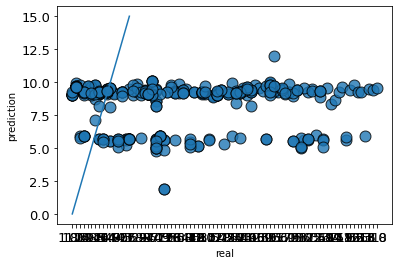

In [105]:
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13



sns.scatterplot(data = ndf_f4,
x = 'real',
y = 'prediction',
s = 120,
alpha = .8,
edgecolor = 'black',
linewidth = 1,
legend = False)



a = np.arange(16)
b = a
plt.plot(a,b)
x=ndf_f4['real']
y=ndf_f4['prediction']
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")



sns.despine()
plt.show()

In [28]:
ycopy = y.copy()
ycopy = ycopy.astype(float)
ycopy.describe()

count    1725.000000
mean        8.699246
std         2.553948
min         2.500000
25%         7.100000
50%         9.000000
75%        10.800000
max        18.600000
Name: Unemployement, dtype: float64

In [29]:
Xcopy = X.copy()
Xcopy = Xcopy.astype(float)
Xcopy.describe()

Approved Amount Content  Approved Amount EIDL  \
count             1.725000e+03          1.725000e+03   
mean              2.595417e+04          1.854951e+04   
std               1.248826e+05          7.187572e+04   
min               0.000000e+00          0.000000e+00   
25%               0.000000e+00          0.000000e+00   
50%               0.000000e+00          0.000000e+00   
75%               6.700000e+03          3.400000e+03   
max               2.028500e+06          1.270500e+06   

       Approved Amount Real Estate  Damaged Property Zip Code  \
count                 1.725000e+03                1725.000000   
mean                  7.765545e+04               38745.656812   
std                   2.418480e+05               26466.899204   
min                   0.000000e+00                1905.000000   
25%                   0.000000e+00               10923.000000   
50%                   3.500000e+03               40361.000000   
75%                   5.050000e+04               60439.000000   
max                   3.778900e+06               97415.000000   

       Fines and Forfeits  Interest Revenue  Market Value  Property Tax  \
count         1725.000000       1725.000000   1725.000000  1.725000e+03   
mean           977.666087       4002.598261   1228.913362  4.550051e+04   
std           3525.635342      11663.902237    182.965842  1.026790e+05   
min              0.000000          0.000000    935.945000  2.740000e+02   
25%             19.000000        398.000000   1135.680000  4.920000e+03   
50%            137.000000       1157.000000   1277.770000  1.114500e+04   
75%            844.000000       2956.000000   1292.780000  3.616800e+04   
max          50044.000000     159718.000000   2076.780000  1.080876e+06   

       Total Salaries & Wages  Verified Loss Content  \
count            1.725000e+03           1.725000e+03   
mean             7.704790e+04           1.125883e+05   
std              1.678891e+05           1.261647e+06   
min              0.000000e+00           0.000000e+00   
25%              6.906000e+03           0.000000e+00   
50%              2.466200e+04           4.510000e+03   
75%              7.251100e+04           2.865000e+04   
max              1.617824e+06           3.536380e+07   

       Verified Loss Real Estate         Year  
count               1.725000e+03  1725.000000  
mean                2.591304e+05  2010.181449  
std                 1.281676e+06     1.420803  
min                 0.000000e+00  2008.000000  
25%                 1.099500e+04  2009.000000  
50%                 4.412400e+04  2010.000000  
75%                 1.633830e+05  2011.000000  
max                 3.339306e+07  2015.000000

In [34]:

corrdf = ma_df.copy()


In [35]:
corrdf


Approved Amount Content Approved Amount EIDL Approved Amount Real Estate  \
0                        0.0                  0.0                         0.0   
1                        0.0                  0.0                         0.0   
2                   162200.0              46900.0                    279800.0   
3                        0.0                  0.0                         0.0   
4                     3700.0               1400.0                     78600.0   
...                      ...                  ...                         ...   
1720                     0.0                  0.0                      8800.0   
1721                     0.0                  0.0                         0.0   
1722                     0.0                  0.0                         0.0   
1723                     0.0                  0.0                         0.0   
1724                     0.0                  0.0                         0.0   

       County Damaged Property Zip Code Fines and Forfeits Interest Revenue  \
0      MARION                   39429.0                  0               18   
1     COAHOMA                   38645.0                  0              459   
2        COOK                   60154.0                137              837   
3        COOK                   60501.0                137              837   
4        COOK                   60501.0                137              837   
...       ...                       ...                ...              ...   
1720    LAMAR                   39455.0                  0               10   
1721  LINCOLN                   39601.0                  0               42   
1722  LINCOLN                   39629.0                  0               42   
1723   MARION                   39643.0                  0               18   
1724   MARION                   39483.0                  0               18   

            Market Value Property Tax SBA Disaster Number  \
0     1382.9099999999999         2505            MS-00059   
1                1277.77         5979            MS-00045   
2                1135.68        11145            IL-00025   
3                1135.68        11145            IL-00025   
4                1135.68        11145            IL-00025   
...                  ...          ...                 ...   
1720  1382.9099999999999         2665            MS-00059   
1721  1382.9099999999999         2970            MS-00059   
1722  1382.9099999999999         2970            MS-00059   
1723  1382.9099999999999         2505            MS-00059   
1724  1382.9099999999999         2505            MS-00059   

     SBA EIDL Declaration Number SBA Physical Declaration Number        State  \
0                        13274.0                           13273  MISSISSIPPI   
1                        12549.0                           12548  MISSISSIPPI   
2                        12291.0                           12290     ILLINOIS   
3                        12291.0                           12290     ILLINOIS   
4                        12291.0                           12290     ILLINOIS   
...                          ...                             ...          ...   
1720                     13274.0                           13273  MISSISSIPPI   
1721                     13274.0                           13273  MISSISSIPPI   
1722                     13274.0                           13273  MISSISSIPPI   
1723                     13274.0                           13273  MISSISSIPPI   
1724                     13274.0                           13273  MISSISSIPPI   

          Timestamp Total Salaries & Wages Unemployement  \
0     1652963921671                   3621          10.3   
1     1652961848596                  39814          13.8   
2     1652963944485                  24662          10.9   
3     1652963946489                  24662          10.9   
4     1652963948533                  24662          10.9   
...             .

In [39]:
matrix = corrdf.corr()
matrix

Timestamp
Timestamp        1.0

In [53]:
ycopy

0       10.3
1       13.8
2       10.9
3       10.9
4       10.9
        ... 
1720     6.5
1721     8.6
1722     8.6
1723    10.3
1724    10.3
Name: Unemployement, Length: 1725, dtype: float64

In [55]:
d = {'Unemployment':ycopy,
   'MV':Xcopy['Market Value'],
}

#Create a DataFrame
dftest = pd.DataFrame(d)
correlation    = dftest['Unemployment'].corr(dftest['MV'])
correlation


-0.11322349733152942

In [56]:
Xcopy.dtypes


Approved Amount Content        float64
Approved Amount EIDL           float64
Approved Amount Real Estate    float64
Damaged Property Zip Code      float64
Fines and Forfeits             float64
Interest Revenue               float64
Market Value                   float64
Property Tax                   float64
Total Salaries & Wages         float64
Verified Loss Content          float64
Verified Loss Real Estate      float64
Year                           float64
dtype: object

In [59]:
Xcopy['Unemployment'] = ycopy
Xcopy

Approved Amount Content  Approved Amount EIDL  \
0                         0.0                   0.0   
1                         0.0                   0.0   
2                    162200.0               46900.0   
3                         0.0                   0.0   
4                      3700.0                1400.0   
...                       ...                   ...   
1720                      0.0                   0.0   
1721                      0.0                   0.0   
1722                      0.0                   0.0   
1723                      0.0                   0.0   
1724                      0.0                   0.0   

      Approved Amount Real Estate  Damaged Property Zip Code  \
0                             0.0                    39429.0   
1                             0.0                    38645.0   
2                        279800.0                    60154.0   
3                             0.0                    60501.0   
4                         78600.0                    60501.0   
...                           ...                        ...   
1720                       8800.0                    39455.0   
1721                          0.0                    39601.0   
1722                          0.0                    39629.0   
1723                          0.0                    39643.0   
1724                          0.0                    39483.0   

      Fines and Forfeits  Interest Revenue  Market Value  Property Tax  \
0                    0.0              18.0       1382.91        2505.0   
1                    0.0             459.0       1277.77        5979.0   
2                  137.0             837.0       1135.68       11145.0   
3                  137.0             837.0       1135.68       11145.0   
4                  137.0             837.0       1135.68       11145.0   
...                  ...               ...           ...           ...   
1720                 0.0              10.0       1382.91        2665.0   
1721                 0.0              42.0       1382.91        2970.0   
1722                 0.0              42.0       1382.91        2970.0   
1723                 0.0              18.0       1382.91        2505.0   
1724                 0.0              18.0       1382.91        2505.0   

      Total Salaries & Wages  Verified Loss Content  \
0                     3621.0                 1323.0   
1                    39814.0                 4280.0   
2                    24662.0               203159.0   
3                    24662.0                 5000.0   
4                    24662.0                 6500.0   
...                      ...                    ...   
1720                  1951.0                    0.0   
1721                   252.0                    0.0   
1722                   252.0                    0.0   
1723                  3621.0                    0.0   
1724                  3621.0                  500.0   

      Verified Loss Real Estate    Year  Unemployment  
0                       72243.0  2012.0          10.3  
1                      191664.0  2011.0          13.8  
2                      358926.0  2010.0          10.9  
3                       28654.0  2010.0          10.9  
4                      105888.0  2010.0          10.9  
...                         ...     ...           ...  
1720                     8787.0  2012.0           6.5  
1721                     9314.0  2012.0           8.6  
1722                    15872.0  2012.0           8.6  
1723                     7100.0  2012.0          10.3  
1724                     8573.0  2012.0          10.3  

[1725 rows x 13 columns]

In [62]:
#Correlation Matrix
Correlation2    = Xcopy.corr(method="pearson")
Correlation2

Approved Amount Content  Approved Amount EIDL  \
Approved Amount Content                     1.000000              0.416740   
Approved Amount EIDL                        0.416740              1.000000   
Approved Amount Real Estate                 0.659065              0.359718   
Damaged Property Zip Code                  -0.017202              0.039691   
Fines and Forfeits                         -0.016806             -0.012043   
Interest Revenue                           -0.015025             -0.003591   
Market Value                                0.039631             -0.057778   
Property Tax                               -0.009469             -0.016077   
Total Salaries & Wages                     -0.014500             -0.023734   
Verified Loss Content                       0.583050              0.223797   
Verified Loss Real Estate                   0.649920              0.287088   
Year                                       -0.041560             -0.077939   
Unemployment                               -0.048577             -0.116359   

                             Approved Amount Real Estate  \
Approved Amount Content                         0.659065   
Approved Amount EIDL                            0.359718   
Approved Amount Real Estate                     1.000000   
Damaged Property Zip Code                       0.027232   
Fines and Forfeits                             -0.041942   
Interest Revenue                               -0.033125   
Market Value                                    0.040617   
Property Tax                                   -0.033432   
Total Salaries & Wages                         -0.040234   
Verified Loss Content                           0.417810   
Verified Loss Real Estate                       0.633326   
Year                                           -0.066324   
Unemployment                                   -0.066842   

                             Damaged Property Zip Code  Fines and Forfeits  \
Approved Amount Content                      -0.017202           -0.016806   
Approved Amount EIDL                          0.039691           -0.012043   
Approved Amount Real Estate                   0.027232           -0.041942   
Damaged Property Zip Code                     1.000000            0.136964   
Fines and Forfeits                            0.136964            1.000000   
Interest Revenue                              0.051875            0.659474   
Market Value                                 -0.060827            0.090892   
Property Tax                                  0.047237            0.723044   
Total Salaries & Wages                        0.017746            0.696462   
Verified Loss Content                         0.007310           -0.012186   
Verified Loss Real Estate                     0.032540           -0.025699   
Year                                         -0.285273           -0.065824   
Unemployment                                 -0.127382           -0.160826   

                             Interest Revenue  Market Value  Property Tax  \
Approved Amount Content             -0.015025      0.039631     -0.009469   
Approved Amount EIDL                -0.003591     -0.057778     -0.016077   
Approved Amount Real Estate         -0.033125      0.040617     -0.033432   
Damaged Property Zip Code            0.051875     -0.060827      0.047237   
Fines and Forfeits                   0.659474      0.090892      0.723044   
Interest Revenue                     1.000000      0.003518      0.589251   
Market Value                         0.003518      1.000000      0.092355   
Property Tax                         0.589251      0.092355      1.000000   
Total Salaries & Wages               0.543271      0.128464      0.954393   
Verified Loss Content               -0.015774      0.025304     -0.019972   
Verified Loss Real Estate           -0.016960      0.038948     -0.022222   
Year                                -0.151293      0.628099     -0.004724   
U

In [77]:
#Removing columns for testing 
X2 = X.copy()
X2.columns
X2.drop(['Total Salaries & Wages'],axis=1)


Approved Amount Content Approved Amount EIDL Approved Amount Real Estate  \
0                        0.0                  0.0                         0.0   
1                        0.0                  0.0                         0.0   
2                   162200.0              46900.0                    279800.0   
3                        0.0                  0.0                         0.0   
4                     3700.0               1400.0                     78600.0   
...                      ...                  ...                         ...   
1720                     0.0                  0.0                      8800.0   
1721                     0.0                  0.0                         0.0   
1722                     0.0                  0.0                         0.0   
1723                     0.0                  0.0                         0.0   
1724                     0.0                  0.0                         0.0   

     Damaged Property Zip Code Fines and Forfeits Interest Revenue  \
0                      39429.0                  0               18   
1                      38645.0                  0              459   
2                      60154.0                137              837   
3                      60501.0                137              837   
4                      60501.0                137              837   
...                        ...                ...              ...   
1720                   39455.0                  0               10   
1721                   39601.0                  0               42   
1722                   39629.0                  0               42   
1723                   39643.0                  0               18   
1724                   39483.0                  0               18   

            Market Value Property Tax Verified Loss Content  \
0     1382.9099999999999         2505                1323.0   
1                1277.77         5979                4280.0   
2                1135.68        11145              203159.0   
3                1135.68        11145                5000.0   
4                1135.68        11145                6500.0   
...                  ...          ...                   ...   
1720  1382.9099999999999         2665                   0.0   
1721  1382.9099999999999         2970                   0.0   
1722  1382.9099999999999         2970                   0.0   
1723  1382.9099999999999         2505                   0.0   
1724  1382.9099999999999         2505                 500.0   

     Verified Loss Real Estate  Year  
0                      72243.0  2012  
1                     191664.0  2011  
2                     358926.0  2010  
3                      28654.0  2010  
4                     105888.0  2010  
...                        ...   ...  
1720                    8787.0  2012  
1721                    9314.0  2012  
1722                   15872.0  2012  
1723                    7100.0  2012  
1724                    8573.0  2012  

[1725 rows x 11 columns]

In [99]:
y2 = ma_df['Unemployement']
#X = ma_df.drop(['Unemployement', 'County', 'SBA Disaster Number', 'State', 'Timestamp','_c0','SBA EIDL Declaration Number','SBA Physical Declaration Number'], axis=1.)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=.25, random_state=0)

In [87]:

clf5 = GridSearchCV(model, {'alpha':[0.5,1,5,10],'l1_ratio': [0.01, 0.01047618, 0.01097504, 0.01149765, 0.01204515,
       0.01261872, 0.0132196 , 0.01384909, 0.01450856, 0.01519943,
       0.0159232 , 0.01668143, 0.01747577, 0.01830794, 0.01917973,
       0.02009303, 0.02104982, 0.02205218, 0.02310226, 0.02420235,
       0.02535482, 0.02656218, 0.02782702, 0.02915209, 0.03054026,
       0.03199453, 0.03351805, 0.03511412, 0.03678619, 0.03853789,
       0.04037299, 0.04229548, 0.04430951, 0.04641945, 0.04862986,
       0.05094553, 0.05337146, 0.05591291, 0.05857538, 0.06136464,
       0.06428671, 0.06734793, 0.07055491, 0.07391461, 0.07743429,
       0.08112157, 0.08498444, 0.08903124, 0.09327075, 0.09771213,
       0.10236501, 0.10723944, 0.11234599, 0.1176957 , 0.12330016,
       0.12917149, 0.1353224 , 0.14176621, 0.14851686, 0.15558896,
       0.16299783, 0.17075949, 0.17889075, 0.1874092 , 0.19633329,
       0.20568232, 0.21547654, 0.22573715, 0.23648634, 0.24774739,
       0.25954467, 0.27190372, 0.28485128, 0.29841539, 0.31262539,
       0.32751204, 0.34310757, 0.35944573, 0.37656189, 0.39449308,
       0.41327813, 0.43295769, 0.45357435, 0.47517274, 0.4977996 ,
       0.52150392, 0.54633699, 0.57235257, 0.59960696, 0.62815916,
       0.65807096, 0.68940711, 0.72223543, 0.75662697, 0.79265618,
       0.83040103, 0.86994322, 0.91136834, 0.95476605]},cv=10)
clf5.fit(X2_train, y2_train)
clf5.cv_results_
df5 = pd.DataFrame(clf5.cv_results_)
df5.sort_values(by=['rank_test_score'])

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0         0.008029      0.001428         0.001576        0.000500         0.5   
1         0.006974      0.000828         0.001580        0.000469         0.5   
2         0.007005      0.000585         0.001307        0.000480         0.5   
3         0.007156      0.000421         0.001670        0.000436         0.5   
4         0.006347      0.000639         0.001456        0.000555         0.5   
..             ...           ...              ...             ...         ...   
270       0.007292      0.001296         0.001839        0.000324           5   
352       0.006516      0.000764         0.001766        0.000512          10   
353       0.006301      0.000663         0.001608        0.000533          10   
269       0.008007      0.000892         0.002039        0.000394           5   
268       0.009064      0.001388         0.001941        0.000775           5   

    param_l1_ratio                                  params  split0_test_score  \
0             0.01        {'alpha': 0.5, 'l1_ratio': 0.01}           0.167161   
1         0.010476  {'alpha': 0.5, 'l1_ratio': 0.01047618}           0.167159   
2         0.010975  {'alpha': 0.5, 'l1_ratio': 0.01097504}           0.167156   
3         0.011498  {'alpha': 0.5, 'l1_ratio': 0.01149765}           0.167153   
4         0.012045  {'alpha': 0.5, 'l1_ratio': 0.01204515}           0.167151   
..             ...                                     ...                ...   
270       0.284851    {'alpha': 5, 'l1_ratio': 0.28485128}          -0.059743   
352       0.129171   {'alpha': 10, 'l1_ratio': 0.12917149}          -0.059773   
353       0.135322    {'alpha': 10, 'l1_ratio': 0.1353224}          -0.059759   
269       0.271904    {'alpha': 5, 'l1_ratio': 0.27190372}          -0.059757   
268       0.259545    {'alpha': 5, 'l1_ratio': 0.25954467}          -0.059771   

     split1_test_score  split2_test_score  split3_test_score  \
0             0.213357           0.219136           0.251895   
1             0.213355           0.219134           0.251892   
2             0.213353           0.219133           0.251888   
3             0.213351           0.219131           0.251885   
4             0.213349           0.219129           0.251881   
..                 ...                ...                ...   
270           0.048592           0.061971           0.010390   
352           0.048609           0.061942           0.010294   
353           0.048573           0.061956           0.010342   
269           0.048572           0.061956           0.010339   
268           0.048552           0.061942           0.010291   

     split4_test_score  split5_test_score  split6_test_score  \
0             0.242546           0.332027           0.375920   
1             0.242543           0.332022           0.375914   
2             0.242539           0.332017           0.375907   
3             0.242535           0.332012           0.375901   
4             0.242531           0.332006           0.375894   
..                 ...                ...                ...   
270           0.021397           0.057203           0.089041   
352           0.021422           0.057293           0.089065   
353           0.021410           0.057249           0.089054   
269           0.021410           0.057250           0.089054   
268           0.021422           0.057295           0.089065   

     split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0             0.339931           0.278611           0.303409         0.272399   
1             0.339927           0.278608           0.303406         0.272396   
2             0.339922           0.278605           0.303402         0.272392   
3             0.339917           0.278602           0.303398         0.272388   
4             0.339911           0.278599           0.303393         0.272384   
..                 ...             

In [100]:
f5= ElasticNet(alpha=0.5, l1_ratio=0.01,max_iter=10000)
f5.fit(X2_train, y2_train)
f5predictions = f5.predict(X2_test)
r2_score(y2_test,f5predictions)

0.3710995666092959

In [93]:
alphas = np.logspace(-1.8,1.1,100)
alphas

array([ 0.01584893,  0.01695481,  0.01813785,  0.01940344,  0.02075734,
        0.02220571,  0.02375514,  0.02541268,  0.02718588,  0.02908281,
        0.0311121 ,  0.03328298,  0.03560534,  0.03808975,  0.0407475 ,
        0.04359071,  0.0466323 ,  0.04988613,  0.05336699,  0.05709074,
        0.06107431,  0.06533585,  0.06989473,  0.07477172,  0.07998901,
        0.08557034,  0.09154111,  0.0979285 ,  0.10476158,  0.11207144,
        0.11989136,  0.12825692,  0.1372062 ,  0.14677993,  0.15702167,
        0.16797805,  0.17969891,  0.19223762,  0.20565123,  0.22000079,
        0.23535161,  0.25177355,  0.26934135,  0.28813496,  0.30823992,
        0.32974773,  0.35275627,  0.37737026,  0.40370173,  0.4318705 ,
        0.46200478,  0.49424171,  0.52872802,  0.56562064,  0.6050875 ,
        0.6473082 ,  0.69247491,  0.74079317,  0.7924829 ,  0.84777934,
        0.90693415,  0.97021657,  1.03791459,  1.11033632,  1.18781136,
        1.27069232,  1.35935639,  1.45420711,  1.55567614,  1.66

In [94]:
clf6 = GridSearchCV(model, {'alpha':alphas,'l1_ratio': [0.01, 0.01047618, 0.01097504, 0.01149765, 0.01204515,
       0.01261872, 0.0132196 , 0.01384909, 0.01450856, 0.01519943,
       0.0159232 , 0.01668143, 0.01747577, 0.01830794, 0.01917973,
       0.02009303, 0.02104982, 0.02205218, 0.02310226, 0.02420235,
       0.02535482, 0.02656218, 0.02782702, 0.02915209, 0.03054026,
       0.03199453, 0.03351805, 0.03511412, 0.03678619, 0.03853789,
       0.04037299, 0.04229548, 0.04430951, 0.04641945, 0.04862986,
       0.05094553, 0.05337146, 0.05591291, 0.05857538, 0.06136464,
       0.06428671, 0.06734793, 0.07055491, 0.07391461, 0.07743429,
       0.08112157, 0.08498444, 0.08903124, 0.09327075, 0.09771213,
       0.10236501, 0.10723944, 0.11234599, 0.1176957 , 0.12330016,
       0.12917149, 0.1353224 , 0.14176621, 0.14851686, 0.15558896,
       0.16299783, 0.17075949, 0.17889075, 0.1874092 , 0.19633329,
       0.20568232, 0.21547654, 0.22573715, 0.23648634, 0.24774739,
       0.25954467, 0.27190372, 0.28485128, 0.29841539, 0.31262539,
       0.32751204, 0.34310757, 0.35944573, 0.37656189, 0.39449308,
       0.41327813, 0.43295769, 0.45357435, 0.47517274, 0.4977996 ,
       0.52150392, 0.54633699, 0.57235257, 0.59960696, 0.62815916,
       0.65807096, 0.68940711, 0.72223543, 0.75662697, 0.79265618,
       0.83040103, 0.86994322, 0.91136834, 0.95476605]},cv=10)
clf6.fit(X2_train, y2_train)
clf6.cv_results_
df6 = pd.DataFrame(clf6.cv_results_)
df6.sort_values(by=['rank_test_score'])

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
98         0.006693      0.000840         0.001425        0.000450   
97         0.006740      0.001029         0.001752        0.000499   
96         0.007157      0.000857         0.001701        0.000640   
95         0.007292      0.001015         0.001691        0.000466   
94         0.007042      0.000697         0.001792        0.000351   
...             ...           ...              ...             ...   
7315       0.006834      0.000676         0.001361        0.000517   
8583       0.006529      0.000492         0.001488        0.000461   
7510       0.006491      0.000435         0.001449        0.000456   
6632       0.006259      0.000690         0.001616        0.000690   
7705       0.006299      0.000587         0.001595        0.000506   

     param_alpha param_l1_ratio  \
98      0.015849       0.954766   
97      0.015849       0.911368   
96      0.015849       0.869943   
95      0.015849       0.830401   
94      0.015849       0.792656   
...          ...            ...   
7315    2.179635       0.599607   
8583    5.238319       0.247747   
7510    2.494421       0.521504   
6632    1.359356       0.954766   
7705    2.854668       0.453574   

                                                 params  split0_test_score  \
98    {'alpha': 0.015848931924611134, 'l1_ratio': 0....           0.186099   
97    {'alpha': 0.015848931924611134, 'l1_ratio': 0....           0.186105   
96    {'alpha': 0.015848931924611134, 'l1_ratio': 0....           0.186111   
95    {'alpha': 0.015848931924611134, 'l1_ratio': 0....           0.186116   
94    {'alpha': 0.015848931924611134, 'l1_ratio': 0....           0.186121   
...                                                 ...                ...   
7315  {'alpha': 2.1796353277791236, 'l1_ratio': 0.59...          -0.059768   
8583  {'alpha': 5.238318721293551, 'l1_ratio': 0.247...          -0.059771   
7510  {'alpha': 2.4944206719053583, 'l1_ratio': 0.52...          -0.059770   
6632  {'alpha': 1.3593563908785262, 'l1_ratio': 0.95...          -0.059770   
7705  {'alpha': 2.8546676634979344, 'l1_ratio': 0.45...          -0.059771   

      split1_test_score  split2_test_score  split3_test_score  \
98             0.228908           0.228721           0.281703   
97             0.228910           0.228727           0.281703   
96             0.228913           0.228733           0.281703   
95             0.228915           0.228738           0.281703   
94             0.228918           0.228744           0.281703   
...                 ...                ...                ...   
7315           0.048553           0.061943           0.010294   
8583           0.048552           0.061942           0.010291   
7510           0.048552           0.061942           0.010290   
6632           0.048550           0.061941           0.010286   
7705           0.048550           0.061941           0.010285   

      split4_test_score  split5_test_score  split6_test_score  \
98             0.280518           0.378757           0.436241   
97             0.280512           0.378751           0.436227   
96             0.280506           0.378744           0.436214   
95             0.280500           0.378738           0.436202   
94             0.280495           0.378732           0.436191   
...                 ...                ...                ...   
7315           0.021421           0.057291           0.089064   
8583           0.021422           0.057294           0.089065   
7510           0.021422           0.057295           0.089065   
6632           0.021423           0.057299           0.089066   
7705           0.021423           0.057299           0.089067   

      split7_test_score  split8_test_score  split9_test_score  \
98             0.382130           0.304405           0.335500   
97             0.382127           0.304406           0.335499   
96             0.382124           0.304407        

In [101]:
f6= ElasticNet(alpha=0.015849, l1_ratio=0.954766,max_iter=10000)
f6.fit(X2_train, y2_train)
f6predictions = f5.predict(X2_test)
r2_score(y2_test,f5predictions)

0.3710995666092959

In [102]:
#MSE
altpredictions = f6.predict(X2_test)
np.sqrt(mean_squared_error(y2_test,altpredictions))

1.9872422017142826